In [3]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from vpython import *

eps       = 1E-3                                             # Precision
n_steps   = 999 
h         = 1e-3
count_max = 100

def f(x, y, F):
    F[0] = y[1]
    F[1] = (2*x*y[1] - 30.*y[0])/(1.-x**2)

def rk4(t, y,h,Neqs):
    F  = [np.zeros for i in range(Neqs)]
    ydumb = [np.zeros for i in range(Neqs)]
    k1 = [np.zeros for i in range(Neqs)]
    k2 = [np.zeros for i in range(Neqs)]
    k3 = [np.zeros for i in range(Neqs)]
    k4 = [np.zeros for i in range(Neqs)]
    f(t, y, F)
    for i in range(0,Neqs):
        k1[i] = h*F[i]
        ydumb[i] = y[i] + k1[i]/2.
    f(t + h/2., ydumb, F)
    for i in range(0,Neqs):
        k2[i] = h*F[i]
        ydumb[i] = y[i] + k2[i]/2.
    f(t + h/2., ydumb, F)
    for i in range(0,Neqs):
        k3[i]=  h*F[i]
        ydumb[i] = y[i] + k3[i]
    f(t + h, ydumb, F)
    for i in range(0,Neqs):
        k4[i]=h*F[i]
        y[i]=y[i]+(k1[i]+2*(k2[i]+k3[i])+k4[i])/6.0
        
def diff(h,val):
    x1=[]
    y1=[]
    y1i = val
    y = [np.zeros for i in range(2)]
    nL = n_steps
    y[0] = 0                                      # Initial left wf
    y[1] = y1i    
    for ix in range(0,nL):
        x = 0.+ h * ix
        rk4(x, y, h, 2)
        x1=append(x1,x)
        y1=append(y1,y[0])
    return [x1,y1]

Initial val of dy/dx is 1.90234375  after  8  iterations, with a precision of  0.0005822133192436851


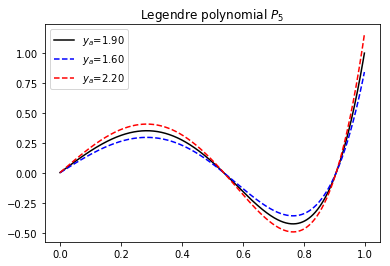

In [6]:
a = 0
def bisection(amin,amax, Nmax, eps):
    for i in range(0,Nmax):
        a=(amin+amax)/2.
        [x,y] = diff(h,a)
        val = y[-1]
        if(val>1):
            amax = a
        else:
            amin = a
        if(abs(val-1.)<eps):
            plt.plot(x,y,'k-',label=r'$y_a$=%.2f' %a)
            print("Initial val of dy/dx is",a," after ",i," iterations, with a precision of ",abs(val-1.))
            break
    return a
a = bisection(1,3,50,eps)
[x,y] = diff(h,a-.3)
plt.plot(x,y,'b--',label=r'$y_a$=%.2f' %(a-.3))
[x,y] = diff(h,a+.3)
plt.plot(x,y,'r--',label=r'$y_a$=%.2f' %(a+.3))
plt.legend()
plt.title(r'Legendre polynomial $P_5$')
plt.show()